#### <h1 style='color:blue'>**Import Librabries**</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, mean_squared_error


#### <h1 style='color:blue'>**Read Data**</h1>

In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.shape

(303, 14)

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



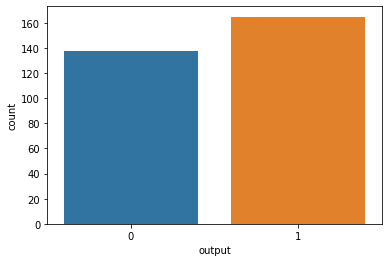

In [ ]:
sns.countplot(df_heart['output'])

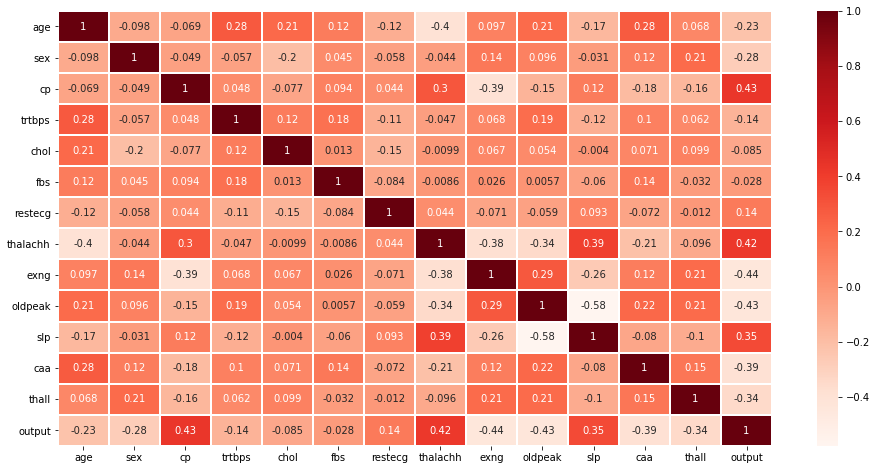

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df_heart.corr(), linewidth = 1, cmap = 'Reds', annot = True)

In [ ]:
X=df_heart.iloc[:, :-1].values
y=df_heart.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print('Shape of train_dataset :', X_train.shape, y_train.shape)
print('Shape of train_dataset :', X_test.shape, y_test.shape)

Shape of train_dataset : (242, 13) (242,)
Shape of train_dataset : (61, 13) (61,)


### <h1 style='color:blue'>**Model Building**</h1>

In [ ]:
def compute(Y_test,Y_pred):
    plt.figure(figsize=(7,3))
    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='OrRd',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

### **1. Logistic Regression**

Execution time of model :0.04209 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



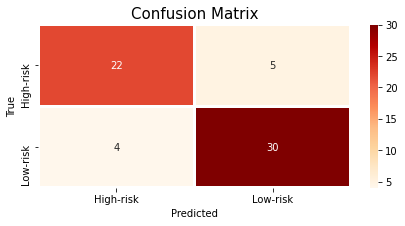

Precision: 0.857 
Recall: 0.882 
F1-Score: 0.87 
Accuracy: 85.246 %
Mean Square Error: 0.148


In [ ]:
start = time.time()

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

end = time.time()

print(f'Execution time of model :{round((end-start), 5)} seconds')

compute(y_test,y_pred)

### **2. KNeighborsClassifier**

Execution time of model : 0.01012 seconds


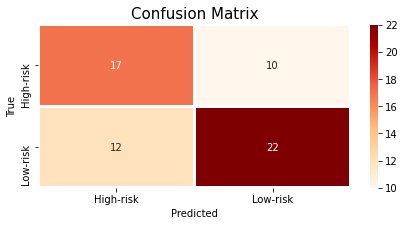

Precision: 0.688 
Recall: 0.647 
F1-Score: 0.667 
Accuracy: 63.934 %
Mean Square Error: 0.361


In [ ]:
start = time.time()

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end - start), 5)} seconds')

compute(y_test, y_pred)

### **3.DecisionTreeClassifier**

Execution time of model : 0.00265 seconds


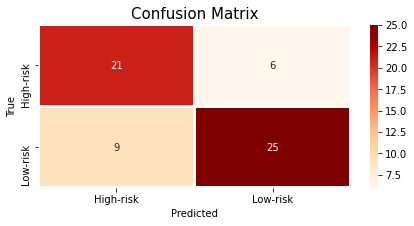

Precision: 0.806 
Recall: 0.735 
F1-Score: 0.769 
Accuracy: 75.41 %
Mean Square Error: 0.246


In [ ]:
start = time.time()

model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

end = time.time()

print(f'Execution time of model : {round((end-start), 5)} seconds')

compute(y_test, y_pred)

### <h1 style='color:blue'>**Accuracy Comparision of all model**</h1>

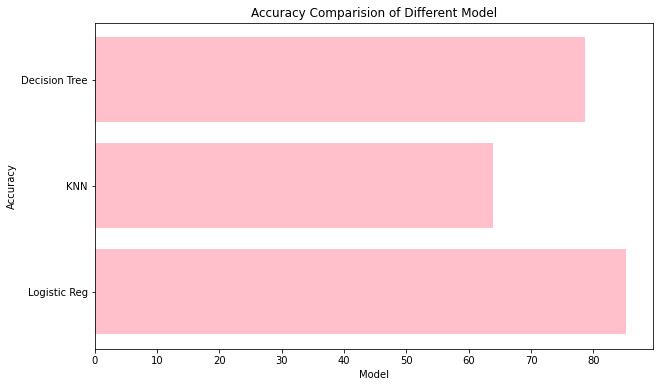

In [ ]:
plt.figure(figsize = (10,6))
Model = ['Logistic Reg', 'KNN',  'Decision Tree']
Accuracy = [85.24, 63.93, 78.69]

plt.barh(Model, Accuracy, color = 'pink')
plt.title('Accuracy Comparision of Different Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

**From above graph is clearly shows that Ada boosting has high accuracy compare to other models.**

### <h1 style='color:blue'>**Execution Time Comparision of all models**</h1>

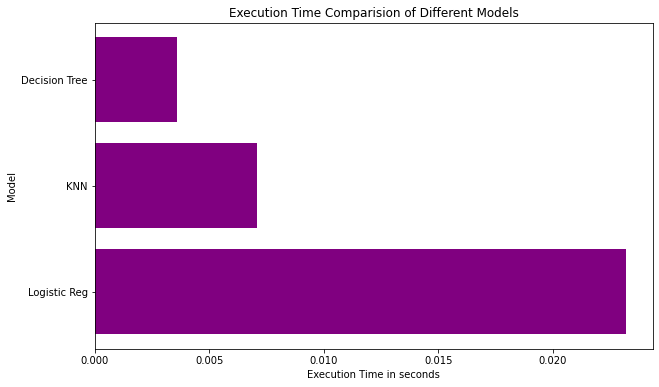

In [ ]:
plt.figure(figsize = (10,6))
Model = ['Logistic Reg', 'KNN',  'Decision Tree']
ExecutionTime = [0.0232, 0.0071,  0.0036]

plt.barh(Model, ExecutionTime, color = 'purple')
plt.title('Execution Time Comparision of Different Models')
plt.xlabel('Execution Time in seconds')
plt.ylabel('Model')
plt.show()

### <h1 style='color:Blue'>**Thank You**</h1>